<a href="https://colab.research.google.com/github/Pennuel/is_it_a_bird_neuralNet/blob/main/Is_a_bird.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from fastai.vision.all import *

In [ ]:
pip install fastai duckduckgo_search

In [ ]:
#this line of code is meant to set up the download the images 
from duckduckgo_search import ddg_images
from fastcore.all import *

def search_images(term,max_images=30):
    print(f"Searching for '{term}'")
    return L(ddg_images(term,max_results = max_images)).itemgot('image')

In [ ]:
#just testing the search images
urls = search_images("bird photos", max_images =1)
urls[0]

Searching for 'bird photos'


'https://www.highreshdwallpapers.com/wp-content/uploads/2014/05/Colourful-Flying-Bird.jpg'

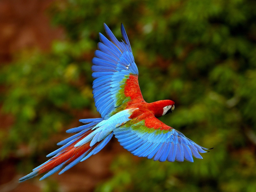

In [6]:
# this is to download the images from the URL
from fastdownload import download_url

dest = 'bird.jpg' # description of the image
download_url(urls[0],dest,show_progress=False)

#prints the downloaded image
from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)


Searching for 'forest photos'


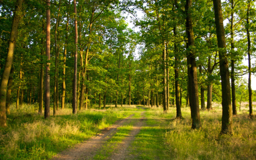

In [9]:
download_url(search_images('forest photos', 2)[0], 'forest.jpg',show_progress =true)
Image.open('forest.jpg').to_thumb(256,256)


In [15]:
searches = 'forest','bird'

path = Path('bird_or_not')
from time import sleep

# this is to download the required images and create dataset.
for term in searches:
   dest = (path/term)
   dest.mkdir(exist_ok=True, parents=True)
   download_images(dest,urls=search_images(f'{term} photo'))

   sleep(10) # Pause between searches to avoid over-loading server

    #bird and forest images when in the sun
   download_images(dest, urls=search_images(f'{term} sun photo'))
   sleep(10)
    #birds and forest images when in shade
   download_images(dest, urls=search_images(f'{term} shade photo'))
   sleep(10)
   resize_images(path/term, max_size=400, dest=path/term)

Searching for 'forest photo'
Searching for 'forest sun photo'
Searching for 'forest shade photo'
Searching for 'bird photo'
Searching for 'bird sun photo'
Searching for 'bird shade photo'


The model may fail if the data has not fully downloaded so i will use have to

In [17]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

0

In [18]:
dls = DataBlock(
      blocks = (ImageBlock,CategoryBlock),
      get_items = get_image_files,
      splitter=RandomSplitter(valid_pct=0.2, seed = 42),
      get_y=parent_label,
      item_tfms=[Resize(192, method='squish')]
).dataloaders(path,bs = 32)

In [19]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,0.838063,0.184501,0.053571,00:29


epoch,train_loss,valid_loss,error_rate,time
0,0.117336,0.050091,0.017857,00:46
1,0.067516,0.019005,0.017857,00:40
2,0.044328,0.005561,0.000000,00:45


In [20]:
#testing the model
is_bird,_,probs = learn.predict(PILImage.create('bird.jpg'))
print(f"This is a: {is_bird}.")
print(f"Probability it's a bird: {probs[0]:.4f}")

This is a: bird.
Probability it's a bird: 1.0000
